# 인천공항 이용자수 분석 및 예측
- https://kosis.kr/search/search.do 에서 <mark>출입국 항구/내외국인/성별 국제이동(연간)</mark> 검색 <br>
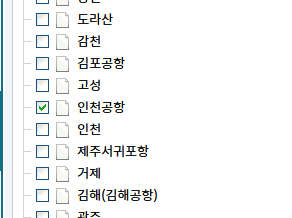

In [63]:
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

In [64]:
file_path="./ref/출입국항구내외국인성별국제이동연간_20250305.csv"
ori=pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [65]:
ex1_data = ori.copy()
ex1_data.columns =["Airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns={"",""})
ex1_data

,Airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [66]:
filter1 = ex1_data['type1']=='외국인'
ex2_data=ex1_data[filter1].copy()
ex3_data=ex1_data[filter1].copy()
# ex1_data[filter1]

In [67]:
ex1_data=ex1_data.groupby('year')['value'].sum().reset_index(name='total') #year를 기준으로 합하는데['value']를 기점으로 
ex1_data

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717
5,2006,996275
6,2007,1012415
7,2008,1080247
8,2009,1009778
9,2010,1019086


In [68]:
filter2=ex2_data['type2']=='입국자'
ex2_filtered = ex2_data[filter2]
filter3=ex2_data['type2']=='출국자'
ex3_filtered=ex2_data[filter3]
ex2_data=ex2_filtered[filter2].groupby('year')['value'].sum().reset_index(name='total')
ex3_data=ex3_filtered[filter3].groupby('year')['value'].sum().reset_index(name='total')
ex3_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_4904\2667119119.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ex2_data=ex2_filtered[filter2].groupby('year')['value'].sum().reset_index(name='total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_4904\2667119119.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ex3_data=ex3_filtered[filter3].groupby('year')['value'].sum().reset_index(name='total')


,year,total
0,2001,72896
1,2002,97493
2,2003,134088
3,2004,123698
4,2005,229675
5,2006,145644
6,2007,127230
7,2008,174604
8,2009,201288
9,2010,163777


In [69]:
# ex2_data

Text(0.3, 0.3, '한글')

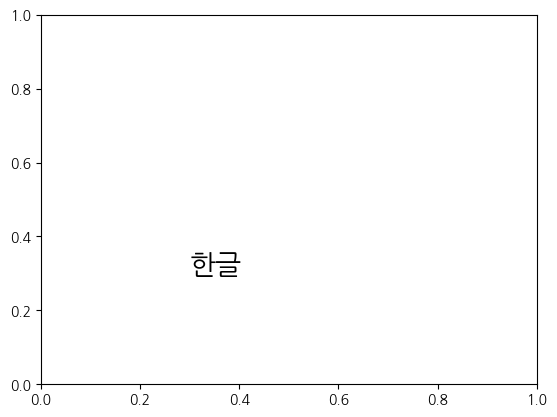

In [70]:
# 윈도우용 폰트  경로 설정
path= "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글', size=20)

<Axes: title={'center': '2021~2023 인천공항 외국인 출국 차트'}>

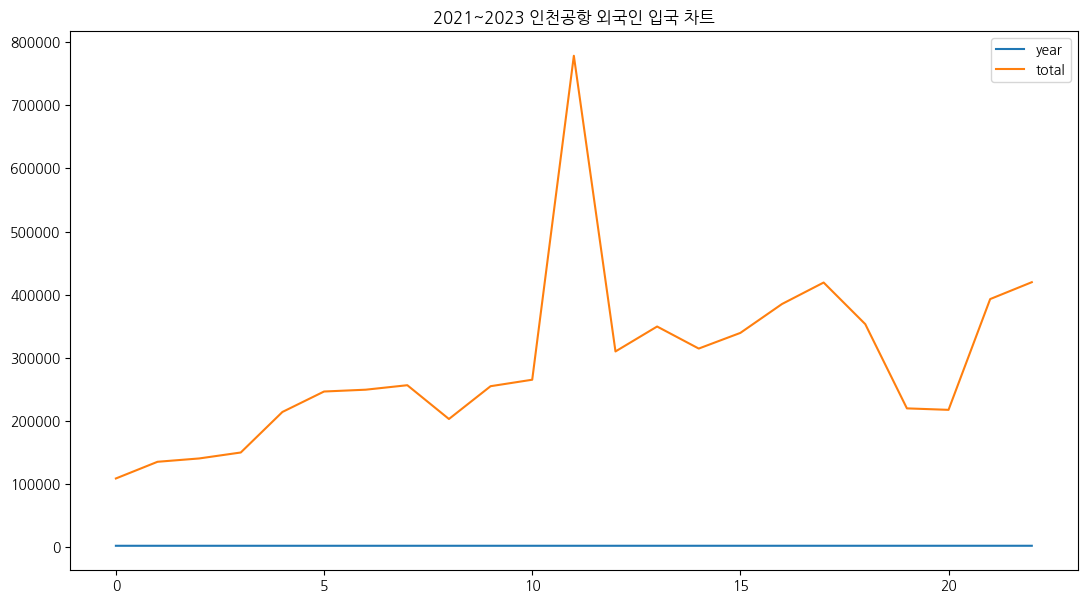

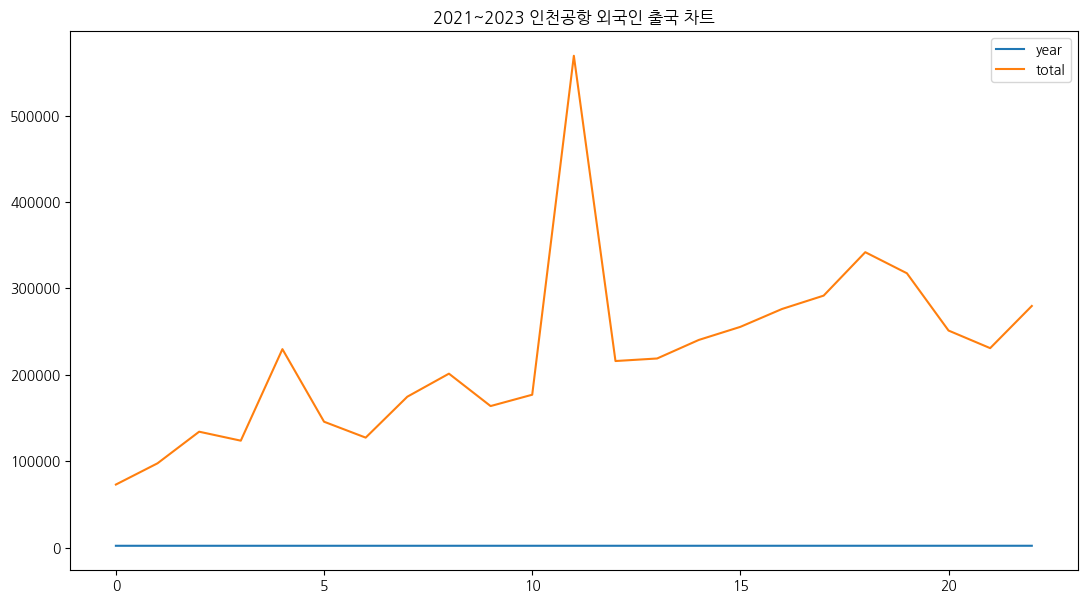

In [71]:
ex2_data.plot(figsize=(13,7),title="2021~2023 인천공항 외국인 입국 차트")
ex3_data.plot(figsize=(13,7),title="2021~2023 인천공항 외국인 출국 차트")

In [72]:
# !pip install --upgrade plotly
# !pip install --upgrade jupter ipyWidgets
# !pip install tqdm

In [73]:
from prophet import Prophet

In [74]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex4_data=ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'],format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [75]:
m = Prophet()
m.fit(ex4_data)

12:12:30 - cmdstanpy - INFO - Chain [1] start processing
12:12:30 - cmdstanpy - INFO - Chain [1] done processing


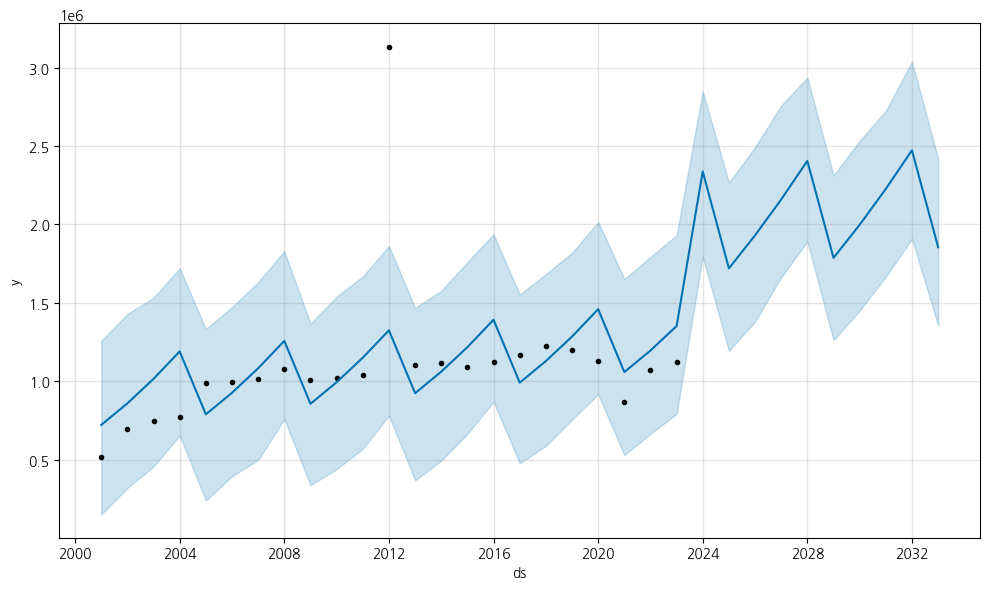

<Figure size 1000x1500 with 0 Axes>

In [78]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/예측.png")
plt.figure(figsize=(10,15))
plt.show()

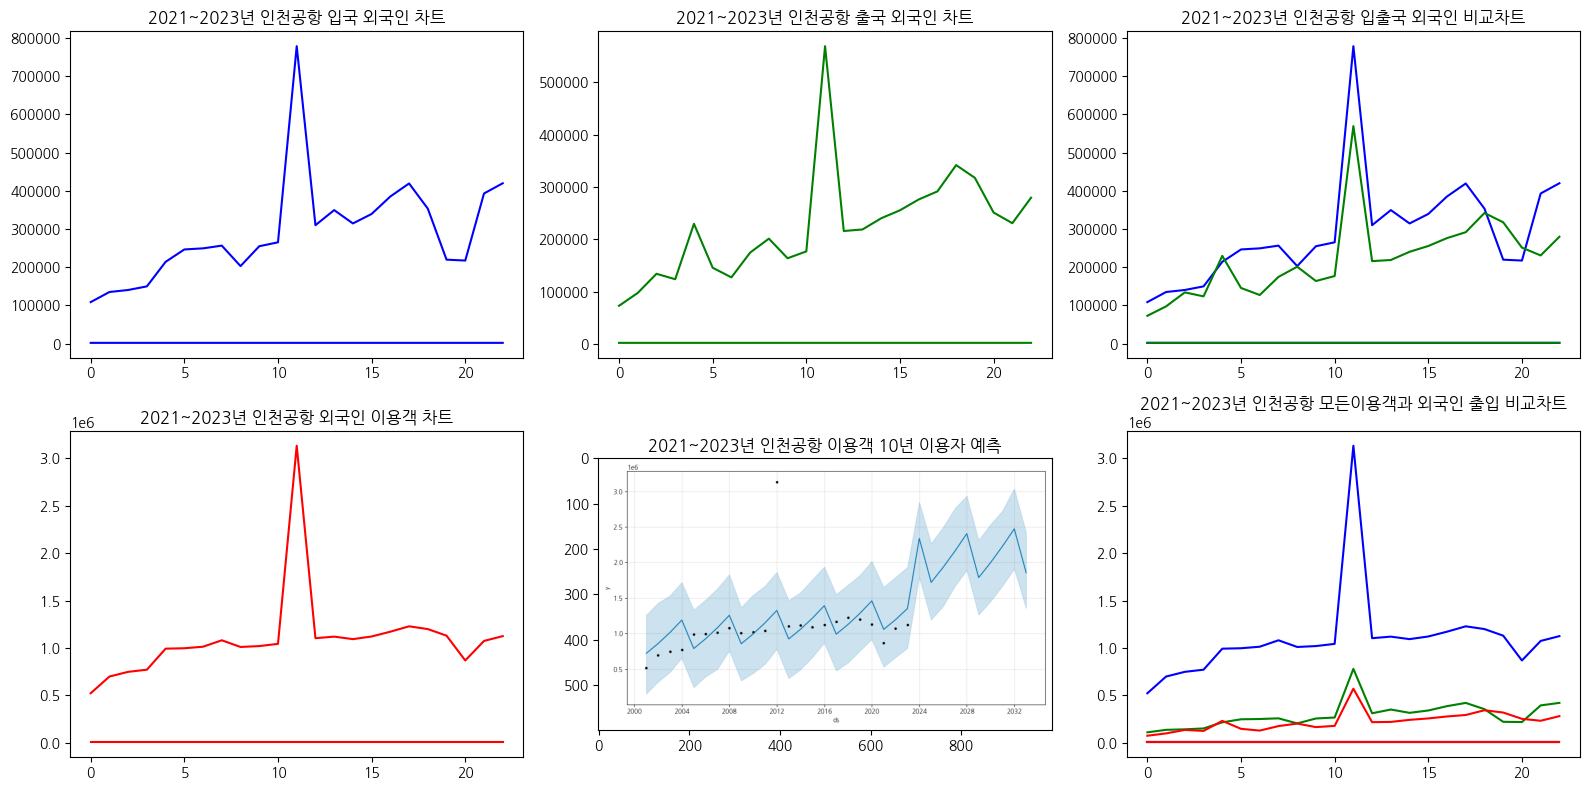

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./chart/예측.png")

fig , axs = plt.subplots(2,3,figsize=(16,8)) # 2 x 2 서브플롯 생성

axs[0,0].plot(ex2_data,color="b")
axs[0,1].plot(ex3_data,color="g") 
axs[0,2].plot(ex2_data,color="b") 
axs[0,2].plot(ex3_data,color="g") 
axs[1,0].plot(ex1_data,color="r") 
axs[1,2].plot(ex1_data,color="b") 
axs[1,2].plot(ex2_data,color="g") 
axs[1,2].plot(ex3_data,color="r") 
axs[0,0].set_title("2021~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 외국인 비교차트")
axs[1,0].set_title("2021~2023년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든이용객과 외국인 출입 비교차트")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()

# 인천공항 외국인 이용객 리포트
- 2001년 부터 2023년 까지의 내용을 바탕으로 정리하였다.
- 인천공항은 계속 우상향하는 그래프를 보여주었고, 그 상승률이 2012년에 피크에 달하였다.
- 그후 다시 이용객은 전과 같은 이용객 수를 보여준다.
- 2012년 사건사고를 고려해봤을때 여수 엑스포 때문에 외국인 이용객이 많지 않았을까 유추해본다.